In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Q1

goal:Develop a modified version of the standard credit default swap pricing formula to take into account the upfront spread.

CDS pricing formula accounts for the fixed running spread $S_c$, the upfront payment $U$, and the recovery rate $R$:

1. **$S_c$**: standardized running spread, fixed at either 100 bps or 500 bps

2. **$U$**: initial payment made by the protection buyer to balance the difference between the fair spread $S_f$ and the fixed spread $S_c$

3. **$R$**: standard recovery rate, restricted to either 20% or 40%

a fixed spread $S_c$ is calculated as:
   $$\text{PremLeg} = S_c \times \text{PV01}$$

   - $S_c$ is the fixed running spread (100 or 500 bps).
   - $\text{PV01}$ is the present value of 1 basis point paid periodically over the life of the contract

adjusted ProtLeg for the recovery rate:
   $$\text{ProtLeg} = (1 - R) \int_0^T \text{DF}(t) \, dQ(t)$$
   where:
   - $R$ is recovery rate (20% or 40%)
   - $\text{DF}(t)$ is discount factor at time $t$
   - $dQ(t)$ is incremental probability of default over time


   $$U = \text{ProtLeg} - \text{PremLeg}$$
substituting:
   $$U = (1 - R) \int_0^T \text{DF}(t) \, dQ(t) - S_c \times \text{PV01}$$

since modified CDS price that taking into account both the upfront payment and fixed running spread is:
   $$\text{CDS Price} = U + S_c \times \text{PV01}$$
   where $U$ is given:
   $$U = (1 - R) \int_0^T \text{DF}(t) \, dQ(t) - S_c \times \text{PV01}$$
   
if $S_f > S_c$, $U$ is positive, if $S_f < S_c$, $U$ is negative.


# Q2

hedging portfolio given by the question:

$$
\Pi(r, t) = V(r, \lambda, t) - \Delta_* V^*(r, \lambda, t) - \Delta Z(r, t)
$$

assume risky zero bond V given by the question:

$$
d\lambda = \gamma(r, \lambda, t) dt + \delta(r, \lambda, t) dW_1
$$

$$
dr = u(r, t) dt + w(r, t) dW_2
$$

$$
dW_1 dW_2 = \rho dt
$$
and p = e{$-\lambda$ T}

use Ito's Lemma for the risky bond $V(r, \lambda, t)$:

$$
dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial r} dr + \frac{\partial V}{\partial \lambda} d\lambda + \frac{1}{2} \frac{\partial^2 V}{\partial r^2} (dr)^2 + \frac{1}{2} \frac{\partial^2 V}{\partial \lambda^2} (d\lambda)^2 + \frac{\partial^2 V}{\partial r \partial \lambda} dr d\lambda
$$

substituting the dynamics of $dr$ and $d\lambda$:

$$
dV = \left( \frac{\partial V}{\partial t} + u(r,t) \frac{\partial V}{\partial r} + \gamma(r, \lambda, t) \frac{\partial V}{\partial \lambda} + \frac{1}{2} w(r,t)^2 \frac{\partial^2 V}{\partial r^2} + \frac{1}{2} \delta(r, \lambda, t)^2 \frac{\partial^2 V}{\partial \lambda^2} + \rho w(r,t) \delta(r, \lambda, t) \frac{\partial^2 V}{\partial r \partial \lambda} \right) dt 
$$

$$
+ \frac{\partial V}{\partial r} w(r,t) dW_2 + \frac{\partial V}{\partial \lambda} \delta(r, \lambda, t) dW_1
$$

since given assumption $p = e^{-\lambda T}$, Z(r, t) is risk-free zero coupon, and recovery $R > 0$ in case of default

the bond PDE is:

$$
\frac{\partial V}{\partial t} + u(r,t) \frac{\partial V}{\partial r} + \gamma(r, \lambda, t) \frac{\partial V}{\partial \lambda} + \frac{1}{2} w(r,t)^2 \frac{\partial^2 V}{\partial r^2} + \frac{1}{2} \delta(r, \lambda, t)^2 \frac{\partial^2 V}{\partial \lambda^2} + \rho w(r,t) \delta(r, \lambda, t) \frac{\partial^2 V}{\partial r \partial \lambda} = r V - \lambda (1 - R) V
$$


### interpretation:
The bond pricing equation above takes into account both market risk and credit risk:

Market Price of Risk: The drift terms $u(r,t)$ and $\gamma(r, \lambda, t)$ are adjusted for the market price of risk to reflect the risk-neutral dynamics.
Credit Price of Risk: The term involving $\lambda$ accounts for the probability of default and the associated recovery rate $R$. A higher default intensity $\lambda$ increases the credit spread, reducing the bond price. The resulting PDE represents the fair value of the risky zero-coupon bond under the risk-neutral measure, considering both the risk-free rate and the impact of default probability.


# Q3

### 3.1
given: $Q \Delta t = I - P_{\Delta t}$
and transition matrix $P_{\Delta t}$ is given by:

$$
P_{\Delta t} = \begin{bmatrix}
1 - p \Delta t & p \Delta t \\
0 & 1
\end{bmatrix}
$$

identity matrix I is:

$$
I = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

since $Q \Delta t = I - P_{\Delta t}$:

$$
Q \Delta t = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} - \begin{bmatrix}
1 - p \Delta t & p \Delta t \\
0 & 1
\end{bmatrix}
$$

$$
Q \Delta t = \begin{bmatrix}
1 - (1 - p \Delta t) & -p \Delta t \\
0 & 1 - 1
\end{bmatrix}
$$

$$
Q \Delta t = \begin{bmatrix}
p \Delta t & -p \Delta t \\
0 & 0
\end{bmatrix}
$$

dividing by $\Delta t$:

$$
Q = \begin{bmatrix}
p & -p \\
0 & 0
\end{bmatrix}
$$

### 3.2
differential equation for the vector of bond values V is given by:

$$
\frac{dV}{dt} = (rI + Q)V
$$

substitute  Q and  rI:

$$
rI + Q = \begin{bmatrix}
r + p & -p \\
0 & r
\end{bmatrix}
$$


$$
\frac{dV}{dt} = \begin{bmatrix}
r + p & -p \\
0 & r
\end{bmatrix} \begin{bmatrix}
V_0 \\
V_1
\end{bmatrix}
$$

which gives two coupled differential equations:

V0:

$$
\frac{dV_0}{dt} = (r + p)V_0 - p V_1
$$

V1:

$$
\frac{dV_1}{dt} = r V_1
$$

### 3.3
since the final condition for the bond value in default is given by:

$$
V_1(T; T) = \theta
$$

and $\theta$ represents the recovery rate of the bond in default

#### interpretation:
hence, we can interpret that the boundary condition $\theta$ implies that at maturity, the value of the bond in the default state is equal to the recovery rate.
The probability of default p plays a crucial role in the pricing solution for bond  V.
This is because the parameter p  directly impacts the intensity matrix  Q, which in turn affects the dynamics of the bond pricing differential equation. Also, a higher default probability p will increases the likelihood of transition from the no default state to the default state, which reducing the value of the bond in $V_0$. As  p  increases, the expected cash flows from the bond decrease due to the higher probability of entering the default state.

# Q 4.1

given:
$$
F\left( x_i \right)_{i \in \mathbb{N}_n^*} = P\left( X_i \leq x_i \right)_{i \in \mathbb{N}_n^*}
$$


goal：derive copula function $C(u_1, u_2, \ldots, u_n)$:

$$
F_i(x_i) = P(X_i \leq x_i)
$$
is the cumulative distribution function of the random variable $X_i$.

define the marginal CDFs $F_i(x_i)$ in terms of uniform random variables $U_i $ on the interval [0, 1]:

$$
U_i = F_i(x_i)
$$

since $F_i(x_i)$ is a CDF, it transforms each $X_i$ into a uniform random variable $U_i$ on [0, 1].


since copula function $C(u_1, u_2, \ldots, u_n)$ captures the dependence structure between the random variables $X_1, X_2, \ldots, X_n$. then by Sklar's theorem, joint CDF $F(x_1, x_2, \ldots, x_n)$ in terms of the copula and the marginal CDF is:

$$
P(X_i \leq x_i) = F_i(x_i) = F(x_1, x_2, \ldots, x_n) = C\left( F_1(x_1), F_2(x_2), \ldots, F_n(x_n) \right)
$$

substituting $ U_i = F_i(x_i)$:

$$
F(x_1, x_2, \ldots, x_n) = C(u_1, u_2, \ldots, u_n)
$$

then copula function $C(u_1, u_2, \ldots, u_n)$ can be defined as:

$$
C\left( u_i \right)_{i \in \mathbb{N}_n^*} = P\left( U_i \leq u_i \right)_{i \in \mathbb{N}_n^*}
$$

hence completes the derivation


# Q 4.2

given: 
risk-neutral rates r = 0, time to maturity of a derivative T = 0.5 (6 months), two assets with the same current price S = 120, strike E = 130, correlation $\rho_k = 0.5$, and volatilities $\sigma_1 = 0.3$ and $\sigma_2 = 0.5$

goal: use Frank Copula to price a bivariate binary call B such that:

$$
B(S_1, S_2, t) = e^{-r(T-t)} C(u_1, u_2)
$$

Where:

$$
C(u_i)_{i \in \mathbb{N}_n} = \frac{1}{\alpha} \ln \left( 1 + \frac{\prod_{i=1}^n \left( e^{\alpha u_i} - 1 \right)}{(e^{\alpha} - 1)^{n-1}} \right)
$$

given: 

$$
\rho_k = 1 - \frac{4}{\alpha} \left( D_1(-\alpha) - 1 \right)
$$


$$
D_1(-\alpha) = \frac{1}{\alpha} \int_0^{\alpha} \frac{x}{e^x - 1} dx + \frac{\alpha}{2}
$$

$$
\frac{x}{e^x - 1} = 1 - \frac{x}{2} + \frac{x^2}{12} - O(x^4)
$$


In [2]:
S1 = 120
S2 = 120
E1 = 130
E2 = 130
T = 0.5
r = 0.0
sigma1 = 0.3
sigma2 = 0.5
rho = 0.5

def frank_copula_cdf(u1, u2, alpha):
    if alpha == 0:
        return u1 * u2  
    return -1 / alpha * np.log(1 + ((np.exp(-alpha * u1) - 1) * (np.exp(-alpha * u2) - 1)) / (np.exp(-alpha) - 1))

def kendall_tau_from_frank_copula(alpha):
    return 1 - (4 / alpha) * (np.exp(alpha) - 1 - alpha) / (np.exp(alpha) - 1)**2

def find_alpha(rho):
    def objective_function(alpha):
        return kendall_tau_from_frank_copula(alpha) - rho
    
    alpha_initial_guess = 1.0 
    alpha = fsolve(objective_function, alpha_initial_guess)
    return alpha[0]

def bivariate_binary_call(S1, S2, E1, E2, T, r, sigma1, sigma2, rho):
    d2_1 = (np.log(S1 / E1) + (r - 0.5 * sigma1**2) * T) / (sigma1 * np.sqrt(T))
    d2_2 = (np.log(S2 / E2) + (r - 0.5 * sigma2**2) * T) / (sigma2 * np.sqrt(T))
    u1 = norm.cdf(d2_1)
    u2 = norm.cdf(d2_2)
    alpha = find_alpha(rho)
    copula_prob = frank_copula_cdf(u1, u2, alpha)
    price = np.exp(-r * T) * copula_prob

    return price

price = bivariate_binary_call(S1, S2, E1, E2, T, r, sigma1, sigma2, rho)
print("Bivariate binary call option price:", price)


Bivariate binary call option price: 0.14230470859385377


# Q 4.3

#### 4.3.a
$$
\text{Total Principal} = \text{Number of CDS} \times \text{Principal per Name} = 125 \times 0.8 \text{ million} = 100 \text{ million}
$$

$$
\text{Attachment Point Amount} = 0.03 \times \text{Total Principal} = 0.03 \times 100 \text{ million} = 3 \text{ million}
$$

$$
\text{Loss per Default} = 0.6 \times 0.8 \text{ million} = 0.48 \text{ million}
$$

$$
N \times \text{Loss per Default} = \text{Attachment Point Amount}
$$

$$
N \times 0.48 \text{ million} = 3 \text{ million}
$$

$$
N = \frac{3 \text{ million}}{0.48 \text{ million}} \approx 6.25
$$

since the number of defaults must be a whole number, we up round up to 7.




#### 4.3.b
given:
$$
A_i = \omega Z + \sqrt{1 - \omega^2} \epsilon_i
$$

we know:

- $A_i$ defaults if $A_i \leq d_i$, where $d_i$ is the default threshold
- $\epsilon_i \sim N(0, 1)$

hence:
$$
P(A_i \leq d_i \mid Z) = P\left( \omega Z + \sqrt{1 - \omega^2} \epsilon_i \leq d_i \mid Z \right)
$$

$$
\epsilon_i \leq \frac{d_i - \omega Z}{\sqrt{1 - \omega^2}}
$$

the default probability conditional on Z is then:

$$
F(t = 1 \mid Z) = \Phi\left( \frac{d_i - \omega Z}{\sqrt{1 - \omega^2}} \right)
$$

given $d_i = -1.88$ :

$$
F(t = 1 \mid Z) = \Phi\left( \frac{-1.88 - \omega Z}{\sqrt{1 - \omega^2}} \right)
$$



#### 4.3.c 

given:K = number of defults by year one, $K \sim \text{Binomial}(n = 125, p = 0.03)$ because K only has 2 outcomes, default or not

goalL calculate probability distribution of K

since the 1st percentile of the normal distribution is $Z \approx -2.33$:

substituting into the conditional default probability formula:

$$
F(t = 1 \mid Z = -2.33) = \Phi\left( \frac{-1.88 - 0.3 \times (-2.33)}{\sqrt{1 - 0.3^2}} \right)
$$


$$
\frac{-1.88 + 0.699}{\sqrt{1 - 0.09}} = \frac{-1.181}{\sqrt{0.91}} = \frac{-1.181}{0.9539} \approx -1.238
$$

$$
F(t = 1 \mid Z = -2.33) = \Phi(-1.238) \approx 0.108
$$

the conditional probability of default for each asset is approximately 10.8%. The number of defaults K follows a binomial distribution with parameters n = 125 and p = 0.108:

$$
K \sim \text{Binomial}(n = 125, p = 0.108)
$$


$$
P(K > 4) = 1 - P(K \leq 4)
$$
  $$
  F(t = 1 \mid Z) = \Phi\left( \frac{-1.88 - \omega Z}{\sqrt{1 - \omega^2}} \right)
  $$

# Q 5 a

given:

$$
\lambda(x) = -\frac{d \ln S(x)}{dx} = -\frac{S'(x)}{S(x)}
$$

$$
S(x) = 1 - F(x)
$$

### Part I: 

$$
F(x) = 1 - e^{-\lambda x}
$$


$$
S(x) = 1 - F(x) = e^{-\lambda x}
$$

to find the hazard rate $\lambda$, first differentiate survival function S:
   $$ 
   S'(x) = \frac{d}{dx} e^{-\lambda x} = -\lambda e^{-\lambda x}
   $$

then apply the Hazard Rate Formula:

   $$
   \lambda(x) = -\frac{S'(x)}{S(x)} = -\frac{-\lambda e^{-\lambda x}}{e^{-\lambda x}} = \lambda
   $$


### Part II: 
given cdf:
$$
F(x) = 1 - \left( \frac{\beta}{x + \beta} \right)^{\alpha}
$$

$$
S(x) = 1 - F(x) = \left( \frac{\beta}{x + \beta} \right)^{\alpha}
$$
 

to find the hazard rate $\lambda$, first differentiate survival function S:

   $$
   S'(x) = \frac{d}{dx} \left( \frac{\beta}{x + \beta} \right)^{\alpha}
   $$

   $$
   S'(x) = \alpha \left( \frac{\beta}{x + \beta} \right)^{\alpha - 1} \cdot \left( \frac{-\beta}{(x + \beta)^2} \right) = -\alpha \beta \left( \frac{\beta}{x + \beta} \right)^{\alpha - 1} \cdot \frac{1}{(x + \beta)^2}
   $$

then apply the Hazard Rate Formula:

   $$
   \lambda(x) = -\frac{S'(x)}{S(x)}
   $$

   Substitute  S(x) and S'(x):

   $$
   \lambda(x) = -\frac{-\alpha \beta \left( \frac{\beta}{x + \beta} \right)^{\alpha - 1} \cdot \frac{1}{(x + \beta)^2}}{\left( \frac{\beta}{x + \beta} \right)^{\alpha}}
   $$

   $$
   \lambda(x) = \frac{\alpha \beta}{x + \beta}
   $$

# Q 5 b

given:
$$
\tau_i = T_n - T_{n-1}
$$

cdf: $F(x) = 1 - e^{-\lambda x}$
pdf: $f(\tau) = \frac{dF}{d\tau} = \lambda e^{-\lambda \tau}$

### Part I:
$$
\mathbb{E}[\tau] = \int_0^\infty \tau f(\tau) \, d\tau
$$

$$
\mathbb{E}[\tau] = \int_0^\infty \tau \lambda e^{-\lambda \tau} \, d\tau
$$

integration by parts:
$u = \tau$ and $dv = \lambda e^{-\lambda \tau} d\tau$
$du = d\tau$ and $v = -e^{-\lambda \tau}$


$$
\int u \, dv = uv - \int v \, du
$$

$$
\mathbb{E}[\tau] = \left[ -\tau e^{-\lambda \tau} \right]_0^\infty + \int_0^\infty e^{-\lambda \tau} \, d\tau
$$

$$
\mathbb{E}[\tau] = 0 + \int_0^\infty e^{-\lambda \tau} \, d\tau = \frac{1}{\lambda}
$$


### Part II: 
given:
$$
T_n = \sum_{i=1}^n \tau_i
$$

since $\tau_i$ iid and by result from part I

$$
\mathbb{E}[T_n] = \sum_{i=1}^n \mathbb{E}[\tau_i] = n \cdot \frac{1}{\lambda} = \frac{n}{\lambda}
$$

### Part III: 

probability of no default occurring within time $\tau$ is:

$$
P(\epsilon_\tau = 0) = e^{-\lambda \tau}
$$

which is equivalent to the survival function $S(\tau)$ of the exponential distribution:

$$
S(\tau) = P(\tau > t) = e^{-\lambda \tau}
$$

the cdf is then:

$$
F(\tau) = 1 - S(\tau) = 1 - e^{-\lambda \tau}
$$
which then concludes that the pdf for a poisson r.v. leads to the cdf of the exponential distribution



# Q 5 c

given:
- Equity Value E: $6$ million
- Volatility of Equity $\sigma_E$: 60% = 0.60
- Debt D: 10 million
- Risk-Free Rate r: 3% per annum = 0.03
- Maturity Time T: 1 year

#### Part I:
according to Merton's model, the value of the equity E is:

$$
E = V_0 \Phi(d_1) - D e^{-rT} \Phi(d_2)
$$
 
$$
d_1 = \frac{\ln\left(\frac{V_0}{D}\right) + \left(r + \frac{\sigma_V^2}{2}\right) T}{\sigma_V \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma_V \sqrt{T}
$$

$$
\sigma_E = \frac{V_0}{E} \Phi(d_1) \sigma_V
$$

then calculate:


In [3]:
E = 6
D = 10
r = 0.03 
T = 1 
sigma_E = 0.60  

def equations(vars):
    V0, sigma_V = vars
    d1 = (np.log(V0 / D) + (r + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))
    d2 = d1 - sigma_V * np.sqrt(T)
    equity_value = V0 * norm.cdf(d1) - D * np.exp(-r * T) * norm.cdf(d2)
    equity_volatility = V0 * norm.cdf(d1) * sigma_V / E
    
    return [equity_value - E, equity_volatility - sigma_E]
initial_guesses = [10, 0.3]
V0, sigma_V = fsolve(equations, initial_guesses)

print(f"Calculated Asset Value V0 in millions: {V0:.2f}")
print(f"Calculated Asset Volatility sigma_V: {sigma_V:.2f}")

Calculated Asset Value V0 in millions: 15.68
Calculated Asset Volatility sigma_V: 0.23



#### Part II:
   $$
   \sigma_E = \frac{V_0}{E} \Phi(d_1) \sigma_V
   $$

   If $\sigma_E$ decreases, for a given $V_0$, the value of $\sigma_V$ will also decrease, given the direct proportionality. Hence, lower equity volatility leads to lower asset volatility.

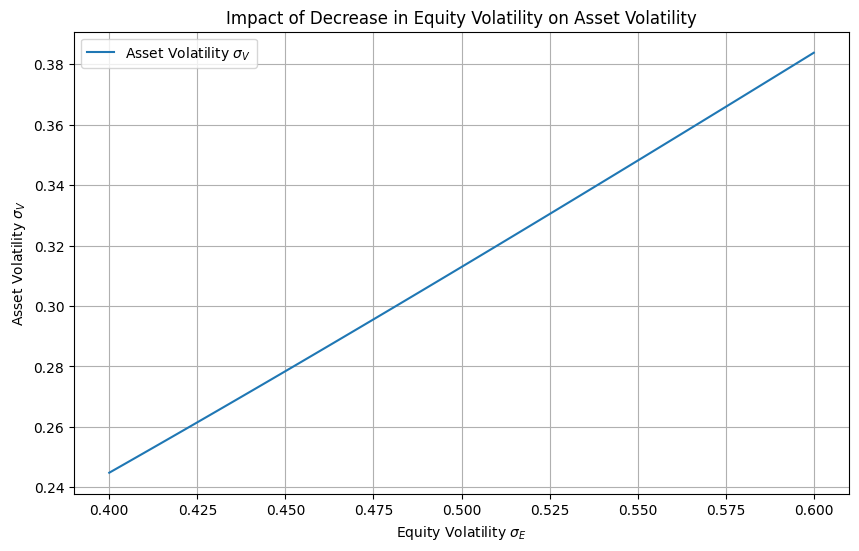

In [4]:
V0 = 100  
E = 60    
D = 50   
r = 0.05  
T = 1    

def calculate_d1(sigma_V):
    return (np.log(V0 / D) + (r + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))

def calculate_sigma_V(sigma_E):
    d1 = calculate_d1(sigma_E)
    N_d1 = norm.cdf(d1)
    return (sigma_E * E) / (V0 * N_d1)
sigma_E_values = np.linspace(0.4, 0.6, 100)
sigma_V_values = [calculate_sigma_V(sigma_E) for sigma_E in sigma_E_values]

plt.figure(figsize=(10, 6))
plt.plot(sigma_E_values, sigma_V_values, label='Asset Volatility $\sigma_V$')
plt.xlabel('Equity Volatility $\sigma_E$')
plt.ylabel('Asset Volatility $\sigma_V$')
plt.title('Impact of Decrease in Equity Volatility on Asset Volatility')
plt.legend()
plt.grid(True)
plt.show()


#### Part III:

$$
P(\text{Default}) = P(V_T < D) = \Phi(-d_2)
$$

Using the previously defined $d_2$:

$$
d_2 = \frac{\ln\left(\frac{V_0}{D}\right) + \left(r - \frac{\sigma_V^2}{2}\right) T}{\sigma_V \sqrt{T}}
$$

To calculate the probability of default, we can first compute $d_2$ using the values of $V_0$, D, r, T , and $\sigma_V$ obtained from Part I. Then evaluate the CDF $\Phi(-d_2)$ to determine the default probability.


In [8]:
E = 6e6  
sigma_E = 0.60 
D = 10e6  
r = 0.03 
T = 1 

def equations(vars):
    V0, sigma_V = vars
    d1 = (np.log(V0 / D) + (r + 0.5 * sigma_V ** 2) * T) / (sigma_V * np.sqrt(T))
    d2 = d1 - sigma_V * np.sqrt(T)
    eq1 = V0 * norm.cdf(d1) - D * np.exp(-r * T) * norm.cdf(d2) - E
    eq2 = (V0 / E) * norm.cdf(d1) * sigma_V - sigma_E
    return [eq1, eq2]

initial_guess = [15e6, 0.3]

V0, sigma_V = fsolve(equations, initial_guess)

sigma_E_values = np.linspace(0.4, 0.6, 50) 
sigma_V_values = []

for sigma_E_new in sigma_E_values:
    def sigma_equation(sigma_V_new):
        V0_new, _ = fsolve(equations, initial_guess)
        d1_new = (np.log(V0_new / D) + (r + 0.5 * sigma_V_new ** 2) * T) / (sigma_V_new * np.sqrt(T))
        return (V0_new / E) * norm.cdf(d1_new) * sigma_V_new - sigma_E_new
    
    sigma_V_solution = fsolve(sigma_equation, sigma_V)
    sigma_V_values.append(sigma_V_solution[0])



d2 = (np.log(V0 / D) + (r - 0.5 * sigma_V ** 2) * T) / (sigma_V * np.sqrt(T))
P_default = norm.cdf(-d2)

print(f"Probability of Default at 1 Year: {P_default:.2%}")

Probability of Default at 1 Year: 2.59%
